# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Data Overview

In [2]:
file_path = r"C:\Users\HP\Downloads\Meesho_Payment_Sheet_Oct.xlsx"

In [3]:
# Loading Order Payments data
order_payments_df = pd.read_excel(r'C:\Users\HP\Downloads\Meesho_Payment_Sheet_Oct.xlsx', sheet_name='Order Payments')

# Loading Purchase Price data
purchase_price_df= pd.read_excel(r'C:\Users\HP\Downloads\Meesho_Payment_Sheet_Oct.xlsx', sheet_name='Purchase Price')

# Shape & Head

In [4]:
order_payments_df.shape

(281, 21)

In [5]:
purchase_price_df.shape

(280, 2)

In [6]:
order_payments_df.head()

,Order Date,Supplier SKU,Live Order Status,Product GST %,Listing Price (Incl. GST & Commission),Quantity,Transaction ID,Payment Date,Final Settlement Amount,Price Type,...,Sale Return Amount (Incl. GST),Shipping Revenue (Incl. GST),Shipping Return Amount (Incl. GST),Return Shipping Charge (Excl. GST),Shipping Charge (Excl. GST),"GST on Shipping Charge', 'CGST + SGST on Shipping Charge",GST on Return Shipping Charge,TCS,TDS Rate %,TDS
0,2023-07-21 12:16:19,ART-MARK-ALC-12SK,Cancelled,18,207.0,1.0,IN6ON231009037US,2023-10-09,201.65,BASIC,...,0.0,108.0,0.0,0.0,-91.53,-16.48,0.0,-2.67,1.0,-2.67
1,2023-07-18 22:47:56,foldingbagfish06,Cancelled,18,264.0,1.0,CB0036177715,2023-10-09,258.12,PREMIUM_RETURN,...,0.0,83.0,0.0,0.0,-70.34,-12.66,0.0,-2.94,1.0,-2.94
2,2023-06-26 13:46:49,UVRESIN-001-HARD-25g,Cancelled,18,196.0,1.0,IN6ON231009037US,2023-10-09,191.51,BASIC,...,0.0,69.0,0.0,0.0,-58.47,-10.52,0.0,-2.25,1.0,-2.25
3,2023-06-21 08:46:57,foldingbagstrawberry06,Cancelled,18,224.0,1.0,IN6ON231012027ZI,2023-10-12,219.06,BASIC,...,0.0,67.0,0.0,0.0,-56.78,-10.22,0.0,-2.47,1.0,-2.47
4,2023-09-23 12:37:15,stampabcdwoodcapitalvintage,Delivered,18,239.0,1.0,YESB32764823640,2023-10-03,233.74,NaN,...,0.0,71.0,0.0,0.0,-60.17,-10.83,0.0,-2.63,1.0,-2.63


In [7]:
purchase_price_df.head(10)

,Supplier SKU,Purchase Price
0,stampabcdwoodcapitalvintage,126.0
1,ART-MARK-ALC-12SK,120.0
2,stampabcdwoodcapitalvintage,126.0
3,PCLAY-BSKIT-BRIGHT-10x10G,97.0
4,EPOXY-PRIME-2:1-300G,225.0
5,foldingbagstrawberry06,182.0
6,PCLAY-BSKIT-BRIGHT-10x10G,97.0
7,foldingbagrose06,188.0
8,PCLAY-BSKIT-BRIGHT-10x10G,97.0
9,ART-MARK-ALC-12SK,120.0


# Data Cleaning

In [8]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Order Date                                                280 non-null    object 
 1   Supplier SKU                                              280 non-null    object 
 2   Live Order Status                                         280 non-null    object 
 3   Product GST %                                             281 non-null    object 
 4   Listing Price (Incl. GST & Commission)                    280 non-null    float64
 5   Quantity                                                  280 non-null    float64
 6   Transaction ID                                            280 non-null    object 
 7   Payment Date                                              280 non-null    object 
 8   Final Settlement Amo

In [9]:
purchase_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Supplier SKU    280 non-null    object 
 1   Purchase Price  280 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


# Cleaning column names before merging

In [10]:
order_payments_df.columns = order_payments_df.columns.str.strip()
purchase_price_df.columns = purchase_price_df.columns.str.strip()

## Merging Order Payments and Purchase Price dataframes on 'Supplier SKU'

In [11]:
meesho_payment_df = pd.merge(order_payments_df, purchase_price_df, on='Supplier SKU', how='left')

In [12]:
meesho_payment_df['Order Date'] = pd.to_datetime(meesho_payment_df['Order Date'])
meesho_payment_df['Payment Date'] = pd.to_datetime(meesho_payment_df['Payment Date'])

In [13]:
meesho_payment_df.head()

,Order Date,Supplier SKU,Live Order Status,Product GST %,Listing Price (Incl. GST & Commission),Quantity,Transaction ID,Payment Date,Final Settlement Amount,Price Type,...,Shipping Revenue (Incl. GST),Shipping Return Amount (Incl. GST),Return Shipping Charge (Excl. GST),Shipping Charge (Excl. GST),"GST on Shipping Charge', 'CGST + SGST on Shipping Charge",GST on Return Shipping Charge,TCS,TDS Rate %,TDS,Purchase Price
0,2023-07-21 12:16:19,ART-MARK-ALC-12SK,Cancelled,18,207.0,1.0,IN6ON231009037US,2023-10-09,201.65,BASIC,...,108.0,0.0,0.0,-91.53,-16.48,0.0,-2.67,1.0,-2.67,120.0
1,2023-07-21 12:16:19,ART-MARK-ALC-12SK,Cancelled,18,207.0,1.0,IN6ON231009037US,2023-10-09,201.65,BASIC,...,108.0,0.0,0.0,-91.53,-16.48,0.0,-2.67,1.0,-2.67,120.0
2,2023-07-21 12:16:19,ART-MARK-ALC-12SK,Cancelled,18,207.0,1.0,IN6ON231009037US,2023-10-09,201.65,BASIC,...,108.0,0.0,0.0,-91.53,-16.48,0.0,-2.67,1.0,-2.67,120.0
3,2023-07-21 12:16:19,ART-MARK-ALC-12SK,Cancelled,18,207.0,1.0,IN6ON231009037US,2023-10-09,201.65,BASIC,...,108.0,0.0,0.0,-91.53,-16.48,0.0,-2.67,1.0,-2.67,120.0
4,2023-07-21 12:16:19,ART-MARK-ALC-12SK,Cancelled,18,207.0,1.0,IN6ON231009037US,2023-10-09,201.65,BASIC,...,108.0,0.0,0.0,-91.53,-16.48,0.0,-2.67,1.0,-2.67,120.0


# Checking for null values

In [14]:
pd.isnull(meesho_payment_df).sum()

Order Date                                                    1
Supplier SKU                                                  1
Live Order Status                                             1
Product GST %                                                 0
Listing Price (Incl. GST & Commission)                        1
Quantity                                                      1
Transaction ID                                                1
Payment Date                                                  1
Final Settlement Amount                                       0
Price Type                                                   53
Total Sale Amount (Incl. Commission & GST)                    0
Sale Return Amount (Incl. GST)                                0
Shipping Revenue (Incl. GST)                                  0
Shipping Return Amount (Incl. GST)                            0
Return Shipping Charge (Excl. GST)                            0
Shipping Charge (Excl. GST)             

In [15]:
meesho_payment_df.dropna(inplace=True)

In [16]:
pd.isnull(meesho_payment_df).sum()

Order Date                                                  0
Supplier SKU                                                0
Live Order Status                                           0
Product GST %                                               0
Listing Price (Incl. GST & Commission)                      0
Quantity                                                    0
Transaction ID                                              0
Payment Date                                                0
Final Settlement Amount                                     0
Price Type                                                  0
Total Sale Amount (Incl. Commission & GST)                  0
Sale Return Amount (Incl. GST)                              0
Shipping Revenue (Incl. GST)                                0
Shipping Return Amount (Incl. GST)                          0
Return Shipping Charge (Excl. GST)                          0
Shipping Charge (Excl. GST)                                 0
GST on S

In [17]:
meesho_payment_df.columns

Index(['Order Date', 'Supplier SKU', 'Live Order Status', 'Product GST %',
       'Listing Price (Incl. GST & Commission)', 'Quantity', 'Transaction ID',
       'Payment Date', 'Final Settlement Amount', 'Price Type',
       'Total Sale Amount (Incl. Commission & GST)',
       'Sale Return Amount (Incl. GST)', 'Shipping Revenue (Incl. GST)',
       'Shipping Return Amount (Incl. GST)',
       'Return Shipping Charge (Excl. GST)', 'Shipping Charge (Excl. GST)',
       'GST on Shipping Charge', 'CGST + SGST on Shipping Charge',
       'GST on Return Shipping Charge', 'TCS', 'TDS Rate %', 'TDS',
       'Purchase Price'],
      dtype='object')

In [18]:
#describe() for specific columns
meesho_payment_df[['Listing Price (Incl. GST & Commission)', 'Quantity', 'Purchase Price']].describe()

,Listing Price (Incl. GST & Commission),Quantity,Purchase Price
count,4426.000000,4426.000000,4426.000000
mean,328.833258,1.018979,280.793832
std,162.465029,0.156520,168.611309
min,76.000000,1.000000,45.000000
25%,189.000000,1.000000,120.000000
50%,363.000000,1.000000,225.000000
75%,463.000000,1.000000,450.000000
max,1234.000000,3.000000,830.000000


# Exploratory Data Analysis

### Calculating Total Profit for Entire Month

In [19]:
meesho_payment_df['Final Settlement Amount'] = pd.to_numeric(meesho_payment_df['Final Settlement Amount'], errors='coerce')
meesho_payment_df['Purchase Price'] = pd.to_numeric(meesho_payment_df['Purchase Price'], errors='coerce')

In [20]:
meesho_payment_df = meesho_payment_df.dropna(subset=['Final Settlement Amount', 'Purchase Price'])

In [21]:
#To calculate profit
meesho_payment_df['Profit'] = meesho_payment_df['Final Settlement Amount'] - meesho_payment_df['Purchase Price']

In [22]:
meesho_payment_df['Month'] = meesho_payment_df['Order Date'].dt.month

In [23]:
meesho_payment_df['Profit']

0        81.65
1        81.65
2        81.65
3        81.65
4        81.65
         ...  
5219    373.80
5220    373.80
5221    373.80
5222    373.80
5223    373.80
Name: Profit, Length: 4426, dtype: float64

In [24]:
meesho_payment_df['State'] = meesho_payment_df['Transaction ID'].str.extract('([A-Za-z]{2})')

In [25]:
total_profit = meesho_payment_df.groupby('Month')['Profit'].sum().sum()

In [26]:
print(f"Total Profit for Entire Month: {total_profit}")

Total Profit for Entire Month: 206522.05000000002


C:\Users\HP\AppData\Local\Temp\ipykernel_3464\2125009247.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month', y='Profit', data=meesho_payment_df, estimator=sum, ci=None)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


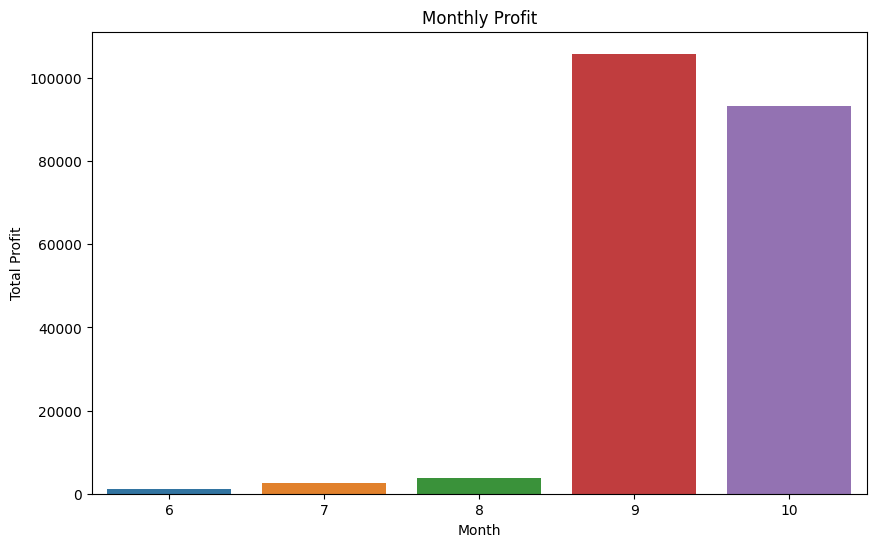

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Profit', data=meesho_payment_df, estimator=sum, ci=None)
plt.title('Monthly Profit')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.show()

### Profitability SKU Wise for Entire Month

In [28]:
sku_profitability = meesho_payment_df.groupby('Supplier SKU')['Final Settlement Amount'].sum()

In [29]:
print("\nProfitability SKU wise for Entire Month:")
print(sku_profitability)


Profitability SKU wise for Entire Month:
Supplier SKU
 Wooden Puzzle                         138.82
ART-AMC-100ML-GP100                  40575.42
ART-BR-COMBO1                          549.26
ART-MARK-ALC-12SK                   141284.92
ART-MARKER-TOUCHDUALTIP-24           40469.44
ART-MARKER-TOUCHDUALTIP-36             438.60
ART-STAMP-ALPHABET-101221              346.10
ART-TOOLS-SHAPER4mm-BLACK01            164.84
EPOXY-PRIME-2:1-1500G                32208.40
EPOXY-PRIME-2:1-300G                 43693.80
EPOXY-PRIME-2:1-750G                902235.03
PCLAY-BSKIT-BRIGHT-10x10G            49661.06
PCLAY-BSKIT-PASTEL-10x10G             1048.44
SmileyFoldingBags12New                8218.38
UVRESIN-001-HARD-100g                59201.50
UVRESIN-001-HARD-10g                  9165.24
UVRESIN-001-HARD-25g                 17980.30
UVRESIN-001-HARD-60g                  6971.80
airdryclaybrown250g                    125.90
diylegosharpener06                     306.24
foldingbagfish03         

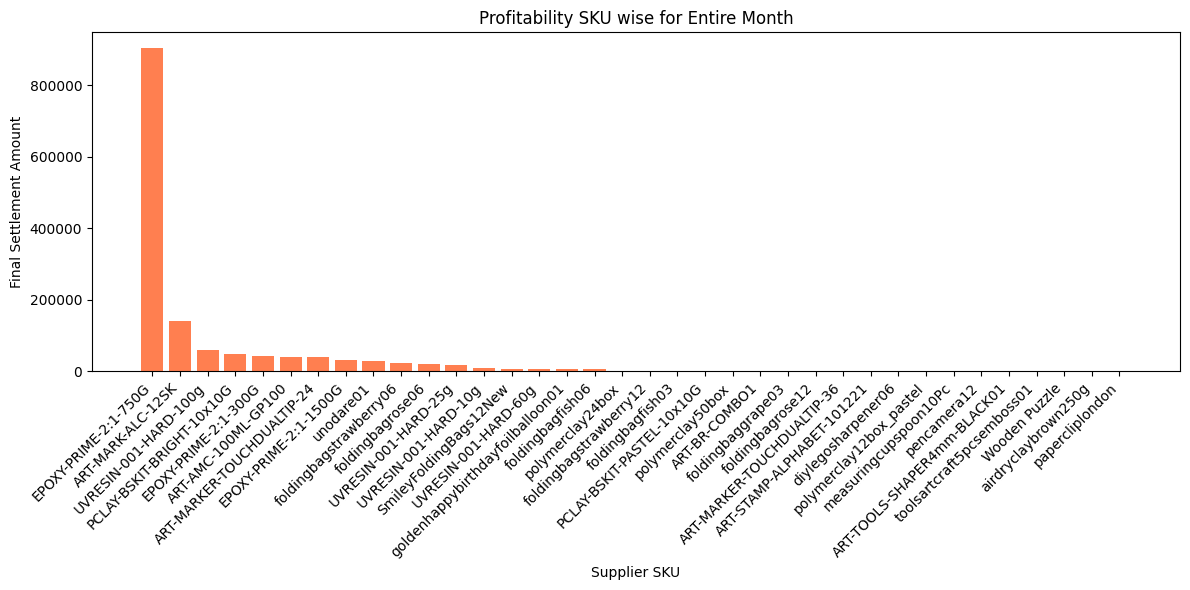

In [30]:
sku_profitability_df = sku_profitability.to_frame().reset_index()

# Sorting data by profitability for better visualization
sku_profitability_df = sku_profitability_df.sort_values(by='Final Settlement Amount', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(sku_profitability_df['Supplier SKU'], sku_profitability_df['Final Settlement Amount'], color='Coral')
plt.xlabel('Supplier SKU')
plt.ylabel('Final Settlement Amount')
plt.title('Profitability SKU wise for Entire Month')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### Total Payment Received for Entire Month

In [31]:
total_payment_received = meesho_payment_df.groupby('Month')['Final Settlement Amount'].sum().sum()
print(f"\nTotal Payment Received for Entire Month: {total_payment_received}")


Total Payment Received for Entire Month: 1449315.5499999998


In [32]:
meesho_payment_df['Total Sale Amount (Incl. Commission & GST)'] = pd.to_numeric(meesho_payment_df['Total Sale Amount (Incl. Commission & GST)'], errors='coerce')

In [33]:
state_wise_sales_percentage = meesho_payment_df.groupby('State')['Total Sale Amount (Incl. Commission & GST)'].sum() / total_payment_received * 100

In [34]:
 meesho_payment_df =  meesho_payment_df.dropna(subset=['Total Sale Amount (Incl. Commission & GST)'])

In [35]:
state_wise_sales_percentage = meesho_payment_df.groupby('State')['Total Sale Amount (Incl. Commission & GST)'].sum() / total_payment_received * 100

In [36]:
print("\nTotal Sales % State Wise:")


Total Sales % State Wise:


In [37]:
print(state_wise_sales_percentage)

State
CB    30.139675
IN    69.012990
YE     3.056270
Name: Total Sale Amount (Incl. Commission & GST), dtype: float64


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


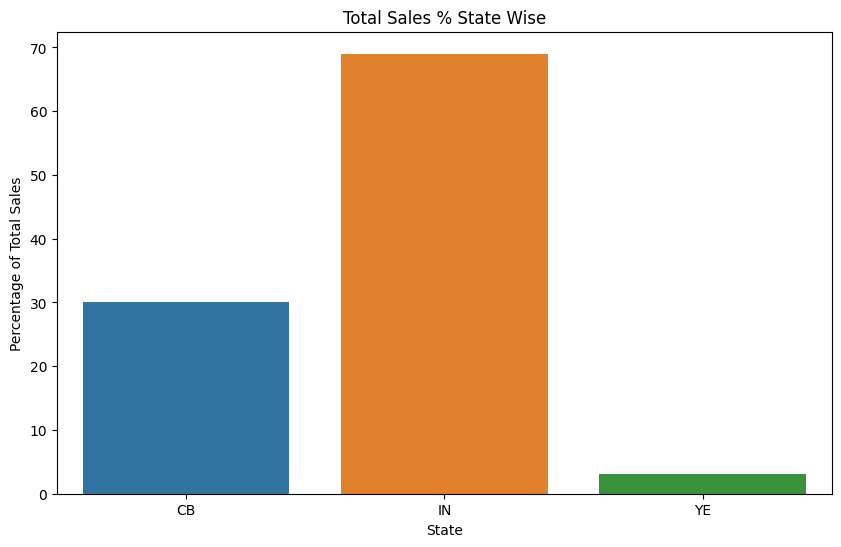

In [38]:
state_wise_sales_percentage = state_wise_sales_percentage.reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=state_wise_sales_percentage.columns[0], y=state_wise_sales_percentage.columns[1], data=state_wise_sales_percentage)
plt.title('Total Sales % State Wise')
plt.xlabel('State')
plt.ylabel('Percentage of Total Sales')
plt.show()

### Calculating Average Profit per Order

In [39]:
average_profit_per_order = total_profit / meesho_payment_df['Transaction ID'].count()

In [40]:
print(f"On average, each order contributed a profit of {average_profit_per_order}")

On average, each order contributed a profit of 46.66110483506552


# Conclusion

The analysis of the data for the entire month reveals a total profit of 206522.05 The SKU "EPOXY-PRIME-2:1-750G" stands out as the most profitable, yielding 902235.03. However, the SKU "papercliplondon" reflects 73.80.

The total payment received for the entire month amounts is 14,49315.5499999998 Examining the sales distribution across states, the majority of sales occurred in 'IN' with 69.01%, followed by 'CB' with 30.13% and 'YE' with 3.05%.

On average, each order contributed a profit of 46.66110483506552.